# Model Evaluation

In [ ]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

In [128]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.dpi"] = 300

sklearn.set_config(display='diagram')

In [129]:
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [130]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
1,58.0,1,0,87.96,39.2
3,70.0,0,0,69.04,35.9
6,52.0,0,0,77.59,17.7
7,75.0,0,1,243.53,27.0
8,32.0,0,0,77.67,32.3



## Is this data imbalanced?

In [131]:
y.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

In [132]:
y = (y == 1).astype('int')

In [133]:
y.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

## Train models for prediction

### Linear model

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [136]:
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42))])
log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=42))])

In [137]:
y_pred = log_reg.predict(X_test)

In [138]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
log_reg.score(X_test, y_test)

0.9811502476609797

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/home/david/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
# %load solutions/01-ex01-solutions.py
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



## Thresholds

## Default

In [142]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/home/david/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using probabilities

In [143]:
y_proba = log_reg.predict_proba(X_test)

In [144]:
y_proba[65:70]

array([[9.99513156e-01, 4.86844076e-04],
       [9.82052253e-01, 1.79477470e-02],
       [9.94416208e-01, 5.58379215e-03],
       [8.50081179e-01, 1.49918821e-01],
       [9.95569630e-01, 4.43036992e-03]])

In [145]:
y_pred[65:70]

array([0, 0, 0, 0, 0])

### Threshold at 0.50

In [146]:
y_pred_50 = y_proba[:, 1] > 0.5
print(classification_report(y_test, y_pred_50))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/home/david/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Threshold at 0.25

In [147]:
y_pred_25 = y_proba[:, 1] > 0.25
print(classification_report(y_test, y_pred_25))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



### Threshold at 0.75

In [148]:
y_pred_75 = y_proba[:, 1] > 0.75
print(classification_report(y_test, y_pred_75))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7131
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



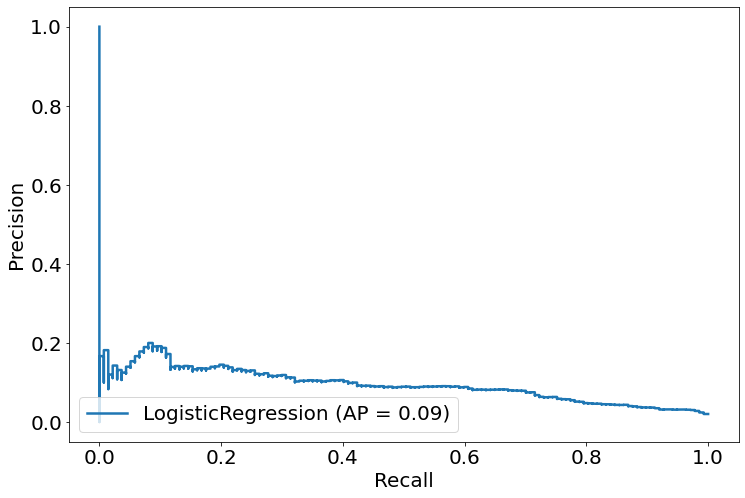

In [149]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(log_reg, X_test, y_test, name="LogisticRegression")

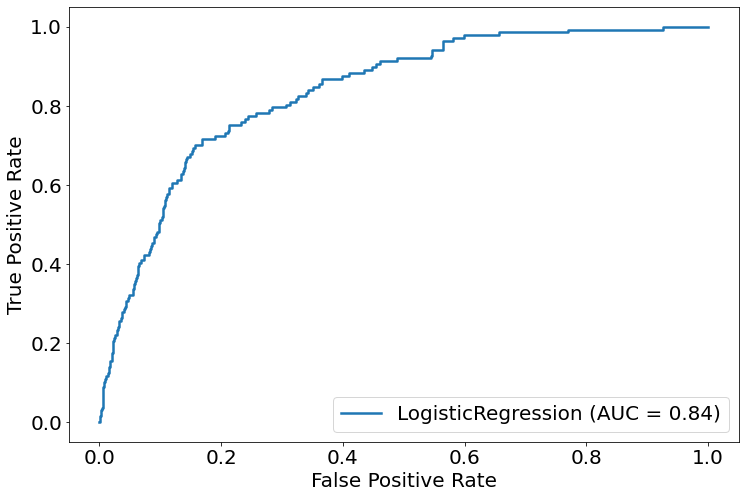

In [150]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg, X_test, y_test, name="LogisticRegression")

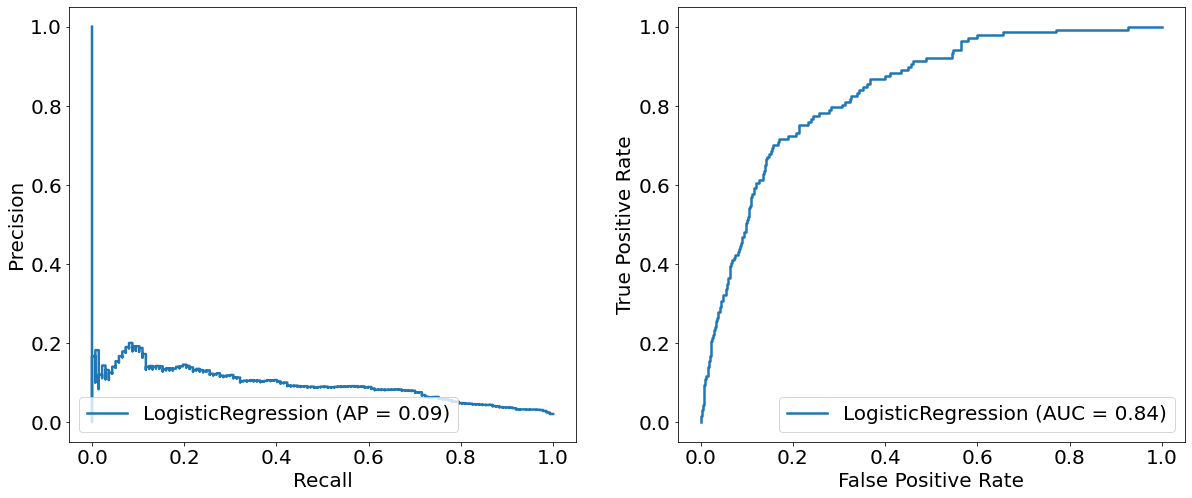

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plot_precision_recall_curve(log_reg, X_test, y_test, name="LogisticRegression", ax=ax1)
plot_roc_curve(log_reg, X_test, y_test, name="LogisticRegression", ax=ax2)

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

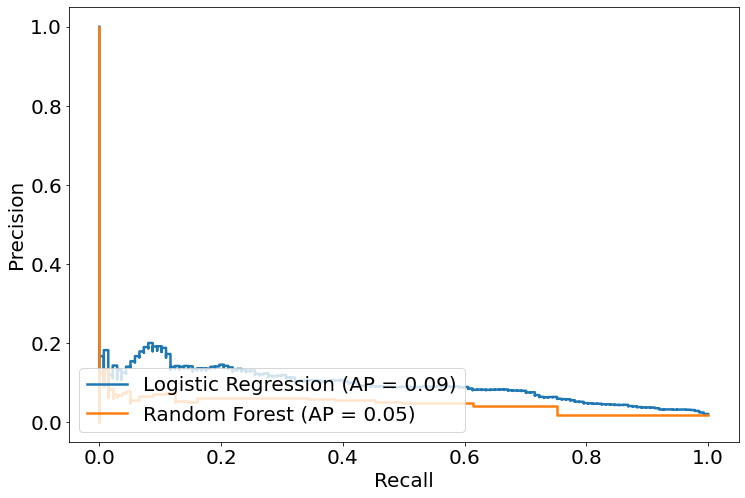

In [153]:
fig, ax = plt.subplots()
plot_precision_recall_curve(log_reg, X_test, y_test, ax=ax, name="Logistic Regression")
plot_precision_recall_curve(rf, X_test, y_test, ax=ax, name="Random Forest")

## Exercise 2

1. Plot the roc curve of the logistic regression model and the random forest model on the same axes.
2. Train a `sklearn.dummy.DummyClassifier(strategy='prior')` on the training dataset and plot the precision recall curve and the roc curve with the test dataset.
3. What is the ROC AUC and the average precision for the dummy classifer?
4. **Extra**: Compute the f1 score for three models we have trained so far. While model performs the best according to the f1 score? **Hint:** `f1_score` is in `sklearn.metrics`

## Decision function

### Comparing decision function vs predictions

In [154]:
log_reg_decision = log_reg.decision_function(X_test)

In [155]:
np.all((log_reg_decision > 0) ==  log_reg.predict(X_test))

True

In [156]:
log_reg_pred = log_reg.predict_proba(X_test)

In [157]:
log_reg_pred

array([[0.99375825, 0.00624175],
       [0.99785633, 0.00214367],
       [0.98641586, 0.01358414],
       ...,
       [0.9772597 , 0.0227403 ],
       [0.93760339, 0.06239661],
       [0.99690984, 0.00309016]])

### Computing the predict_proba from the decision function

In [158]:
1/(1 + np.exp(-log_reg_decision))

array([0.00624175, 0.00214367, 0.01358414, ..., 0.0227403 , 0.06239661,
       0.00309016])

In [159]:
log_reg_pred[:, 1]

array([0.00624175, 0.00214367, 0.01358414, ..., 0.0227403 , 0.06239661,
       0.00309016])

### Ranking metrics

In [160]:
from sklearn.metrics import average_precision_score

#### Using the decision function to compute the average precision

In [161]:
average_precision_score(y_test, log_reg_decision)

0.09421224656746816

#### Using predict_proba to compute the average precision

In [162]:
average_precision_score(y_test, log_reg_pred[:, 1])

0.09421224656746816

## Exercise 3

1. Compute the `roc_auc_score` for the random forest. **Hint**: Use `predict_proba`.
2. Train a `sklearn.svm.SVC` model on the training datast and compute the average precision. **Hint**: Use `decision_function`.

In [163]:
# %load solutions/01-ex03-solutions.py
from sklearn.metrics import roc_auc_score

rf_proba = rf.predict_proba(X_test)

roc_auc_score(y_test, rf_proba[:, 1])

from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(X_train, y_train)

svc_decision = svc.decision_function(X_test)

roc_auc_score(y_test, svc_decision)


0.538190915167353

## Multiclass

In [193]:
## Reading the dataset using pandas
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/CTG.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


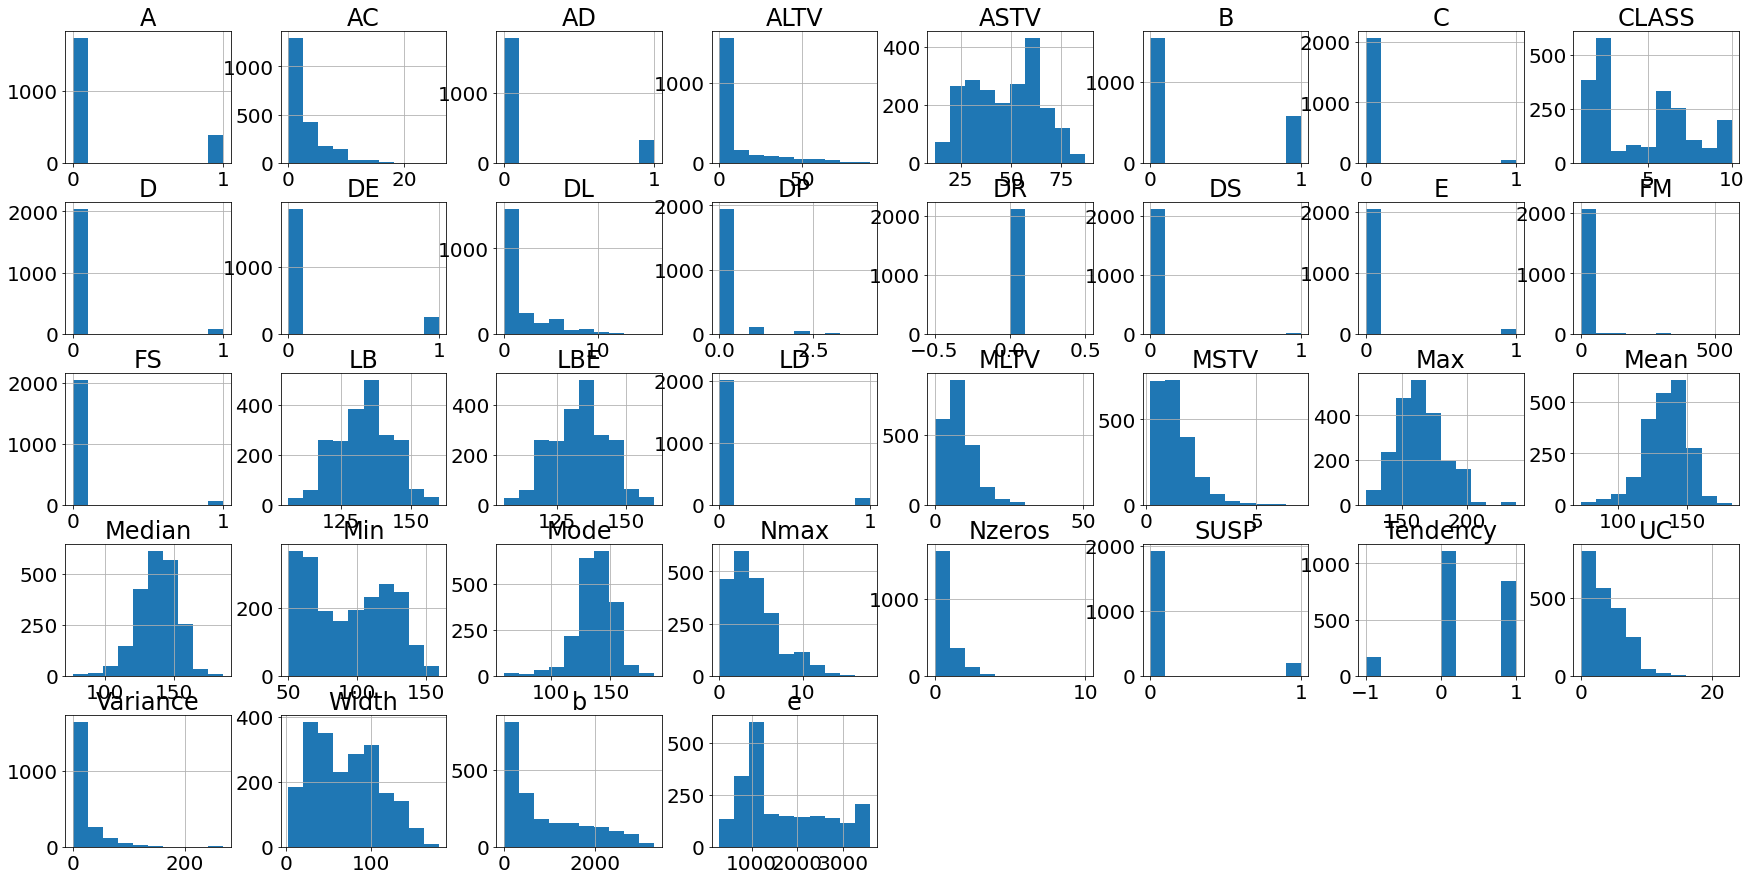

In [212]:
sklearn.set_config(display='diagram')

df=df.dropna()

df.isnull().sum()



X, y = df.drop(['NSP', 'FileName', 'Date', 'SegFile'], axis = 1), df['NSP']

X


_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [214]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [215]:
from sklearn.metrics import plot_confusion_matrix

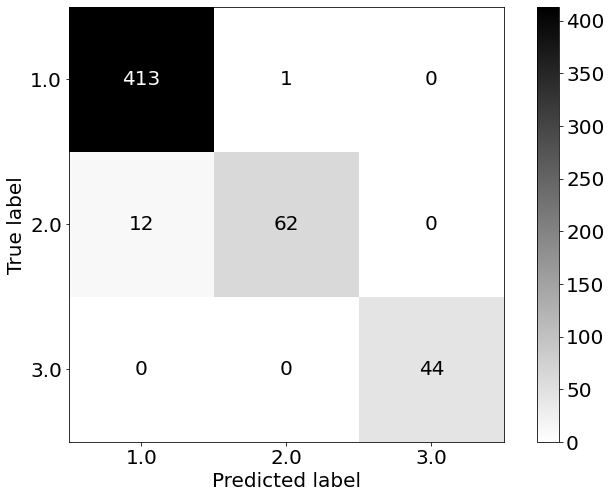

In [216]:
plot_confusion_matrix(rf, X_test, y_test, cmap='gray_r')

In [217]:
y_pred = rf.predict(X_test)

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       414
         2.0       0.98      0.84      0.91        74
         3.0       1.00      1.00      1.00        44

    accuracy                           0.98       532
   macro avg       0.99      0.95      0.96       532
weighted avg       0.98      0.98      0.97       532



In [219]:
from sklearn.metrics import roc_auc_score

In [220]:
rf_y_pred_proba = rf.predict_proba(X_test)

In [221]:
roc_auc_score(y_test, rf_y_pred_proba, multi_class='ovo')

0.9980180279093323

In [222]:
roc_auc_score(y_test, rf_y_pred_proba, multi_class='ovr')

0.9985885196707779

## Regression

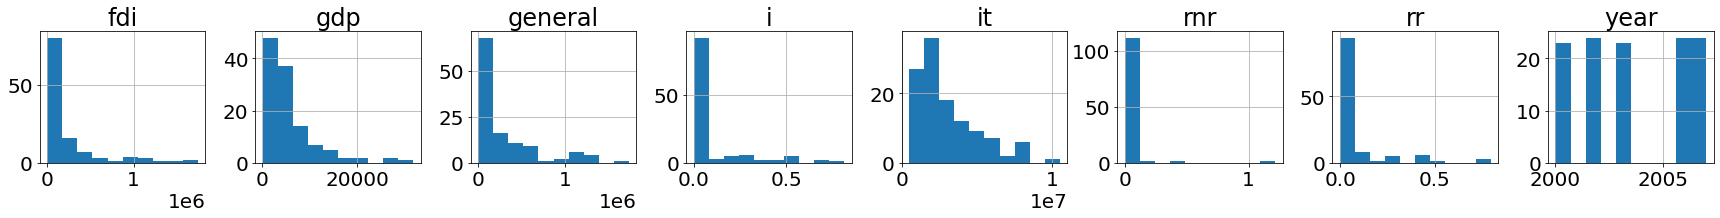

In [264]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



df.columns

sklearn.set_config(display='diagram')

df=df.dropna()

df.isnull().sum()



X, y = df.drop(['specific', 'Unnamed: 0'], axis = 1), df['specific']

X = X.select_dtypes(include='number')
X


_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [265]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [266]:
from sklearn.pipeline import make_pipeline

ridge = make_pipeline(StandardScaler(), Ridge())
ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [267]:
ridge.score(X_test, y_test)

0.7482100751181446

In [268]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [269]:
ridge_pred = ridge.predict(X_test)

### Look at predictions

In [270]:
ridge_pred[:10]

array([2027961.35376795, 1530619.74443469, 1639626.98468177,
        965135.26705736,  438579.62245477,  690017.03701487,
        337043.03751396,  630817.75885244, 2231143.82393699,
        -50934.54700348])

In [271]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_r2

0.7482100751181446

In [272]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mse

165402066384.76834

In [273]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mae

275823.0351447304

## Prediction plots

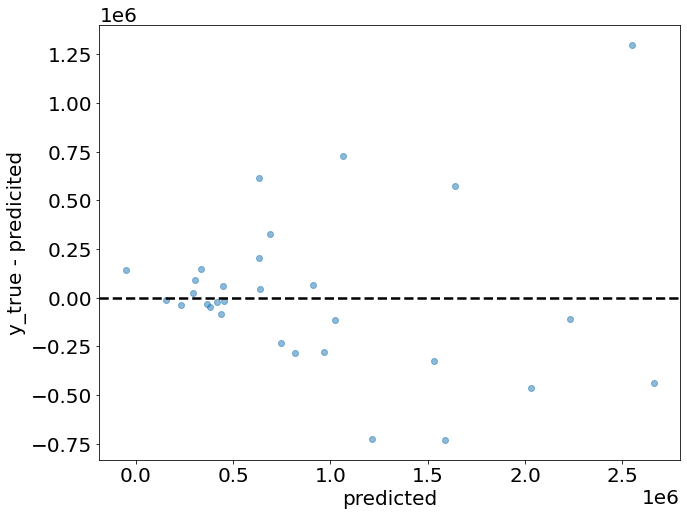

In [274]:
fig, ax = plt.subplots()
delta = y_test - ridge_pred
ax.plot(ridge_pred, delta, 'o', alpha=0.5)
ax.axhline(y=0, c='k', ls='--')
ax.set(xlabel='predicted', ylabel='y_true - predicited', aspect='equal');

## Prediction plots histogram

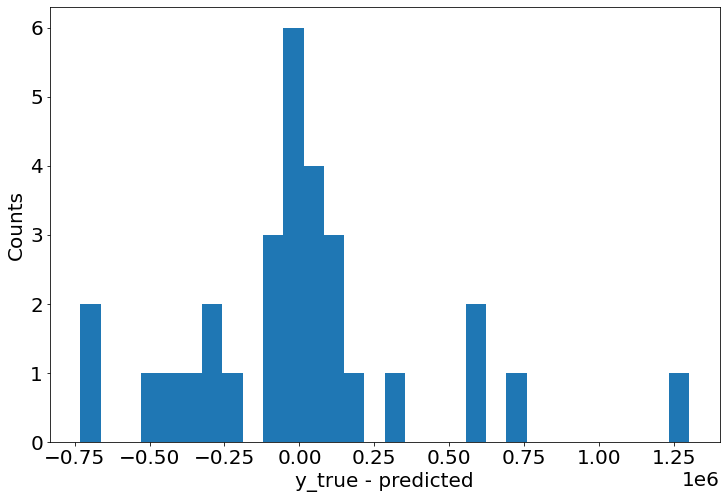

In [275]:
fig, ax = plt.subplots()
ax.hist(delta, bins=30)
ax.set(xlabel="y_true - predicted", ylabel="Counts");

In [276]:
# %load solutions/01-ex04-solutions.py
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_test)


r2_score(y_test, rf_pred)

mean_squared_error(y_test, rf_pred)

mean_absolute_error(y_test, rf_pred)

243725.82533333328

## Prediction plots per feature

In [277]:
from sklearn.datasets import load_boston
import pandas as pd

In [283]:
X_df = pd.DataFrame(X, columns=boston.feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [284]:
ridge = make_pipeline(StandardScaler(), Ridge(random_state=42))
ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

In [285]:
ridge_pred = ridge.predict(X_test)

In [286]:
X_test.head()

,general,year,gdp,fdi,rnr,rr,i,it
166,763953.0,2006,7688.67,259335,0.0,0.4375,0.000000,6349262
262,112137.0,2006,21900.19,1000069,0.0,0.0000,0.000000,5304833
11,178705.0,2007,7360.92,299892,0.0,0.0000,0.324324,7040099
139,241282.0,2003,6867.70,53903,0.0,0.0000,0.516129,3586373
78,100000.0,2002,2523.73,41726,0.0,0.0000,0.400000,2138758


In [287]:
X_analysis = X_test.assign(
    delta=y_test - ridge_pred
)

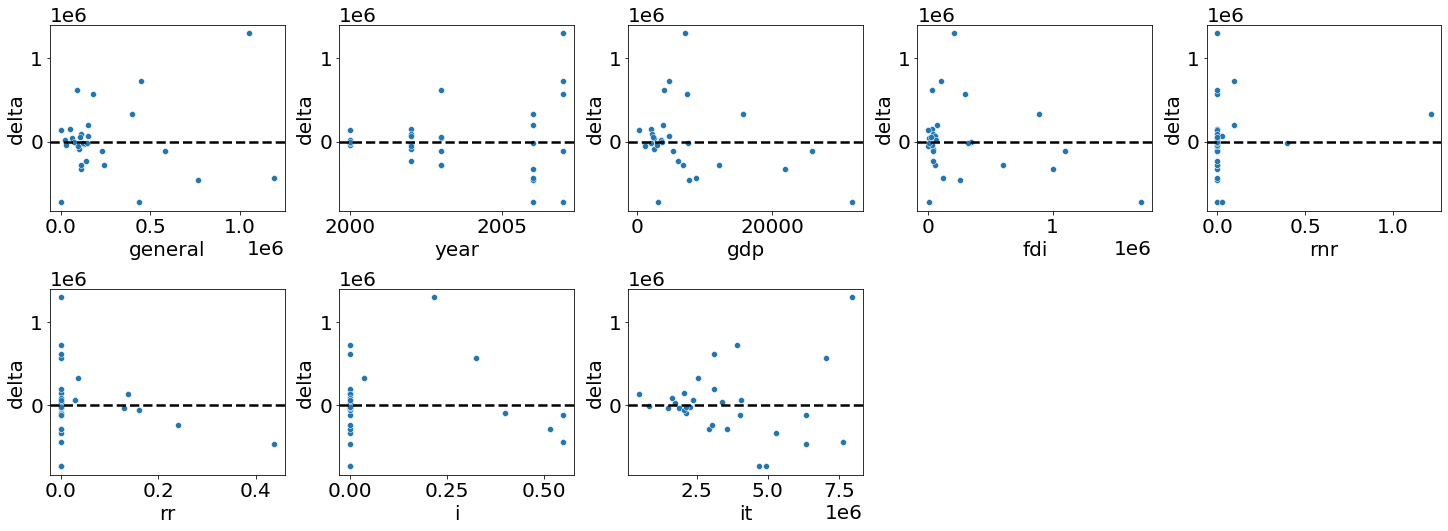

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = X_analysis.columns
n_features = X.shape[1]

fig, axes = plt.subplots(3, 5, figsize=(20, 10), constrained_layout=True)
for i, ax in enumerate(axes.ravel()):
    if i >= n_features:
        ax.set_visible(False)
        continue
    sns.scatterplot(x=columns[i], y='delta', ax=ax, data=X_analysis)
    ax.axhline(y=0, c='k', ls='--')